<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

Для начала нам необходимо импортировать библиотеки и функции, которые могут понадобиться в процессе работы.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve 
from sklearn.preprocessing import StandardScaler 

Теперь прочтём файл с данными и сохраним его в переменной df.

In [2]:
df = pd.read_csv('/datasets/Churn.csv')

Теперь просмотрим общую информацию о данных.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Исходя из документации к данным мы знаем, что:
**RowNumber** — индекс строки в данных
**CustomerId** — уникальный идентификатор клиента
**Surname** — фамилия
**CreditScore** — кредитный рейтинг
**Geography** — страна проживания
**Gender** — пол
**Age** — возраст
**Tenure** — сколько лет человек является клиентом банка
**Balance** — баланс на счёте
**NumOfProducts** — количество продуктов банка, используемых клиентом
**HasCrCard** — наличие кредитной карты
**IsActiveMember** — активность клиента
**EstimatedSalary** — предполагаемая зарплата

Целевой признак исследования:
**Exited** — факт ухода клиента

Также мы видим, что в столбце Tenure есть пропущенные значения.

Выведем таблицу на экран.

In [4]:
display(df)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


Пропущенные значения заполним 0, так как, вероятно, пользователь является клиентом банка менее года.

In [5]:
df['Tenure'] = df['Tenure'].fillna(0)

Проверим данные на наличие дубликатов.

In [6]:
df.duplicated().sum()

0

Дубликаты отсутствуют.

Удалим неинформативные колонки.

In [7]:
df = df.drop(['RowNumber','CustomerId', 'Surname'], axis=1)

Избавимся от категориальных признаков, в данном исследовании они нам не понадобятся.

In [8]:
df = pd.get_dummies(df,drop_first=True)

Нам необходимо извлечь признаки.

In [9]:
features = df.drop(['Exited'], axis=1)

И целевой признак.

In [10]:
target = df['Exited']

Разделим данные на три выборки - обучающую (60%), валидационную (20%) и тестовую (20%).

In [11]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, stratify = target, test_size=0.4, random_state=12345)

Теперь пополам разделим валидационную выборку, чтобы получить валидационную и тестовую

In [12]:
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=12345)

Мы разбили данные на выборки, но, прежде чем переходить к исследованию задачи, нужно масштабировать признаки.

In [13]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [14]:
scaler = StandardScaler()
scaler.fit(features_train.copy()[numeric]) 

features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

features_valid[numeric] = scaler.transform(features_valid[numeric]) 

/tmp/ipykernel_100/3929994166.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Оценим размер выборок

In [15]:
print(features_train.shape)

(6000, 11)


In [16]:
print(features_valid.shape)

(2000, 11)


**Вывод**

В ходе выполнения этого шага мы изучили данные, заполнили пропуски, раделили признаки и целевой признак, масштабировали данные. Теперь можно переходить к исслледованию задачи.

## Исследование задачи

Чтобы обучить модель, нужно выбрать наиболее подходящий способ. Протестируем дерево решений, случайный лес и логистическую регрессию. 

Начнём с дерева решений. Так как слишком высокое дерево решений имеет склонность к переобучению, а слишком низкое - к недообучению, установим параметры высоты от 1 до 5, как наиболее часто встречающиеся. Если при проверке дерева решений с этими гиперпараметрами увидим необходимость проверить более высокое дерево, то сделаем это следующим шагом.

In [17]:
for depth in range(1, 11):
    dtc_model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    dtc_model.fit(features_train, target_train)
    
    dtc_valid_predictions = dtc_model.predict(features_valid)
    accuracy = accuracy_score(target_valid, dtc_valid_predictions)
    f1 = f1_score(target_valid, dtc_valid_predictions)
    print(f"DecisionTreeClassifier. max_depth = {depth}; accuracy = {accuracy}; F1 = {f1}")

DecisionTreeClassifier. max_depth = 1; accuracy = 0.8045; F1 = 0.0
DecisionTreeClassifier. max_depth = 2; accuracy = 0.8405; F1 = 0.5129770992366413
DecisionTreeClassifier. max_depth = 3; accuracy = 0.845; F1 = 0.5259938837920489
DecisionTreeClassifier. max_depth = 4; accuracy = 0.855; F1 = 0.5117845117845117
DecisionTreeClassifier. max_depth = 5; accuracy = 0.8595; F1 = 0.5245346869712352
DecisionTreeClassifier. max_depth = 6; accuracy = 0.8605; F1 = 0.5478119935170178
DecisionTreeClassifier. max_depth = 7; accuracy = 0.859; F1 = 0.5607476635514019
DecisionTreeClassifier. max_depth = 8; accuracy = 0.854; F1 = 0.525974025974026
DecisionTreeClassifier. max_depth = 9; accuracy = 0.8385; F1 = 0.4976671850699844
DecisionTreeClassifier. max_depth = 10; accuracy = 0.8325; F1 = 0.5051698670605612


Наилучший результат показывает дерево решений с параметром depth = 7, после него значение f1 начинает снижаться.

Теперь обучим модель с помощью случайного леса. Посмотрим, как влияет на значение f1 количество деревьев от 10 до 100.

In [18]:
for i in range(10, 101, 10):
    rfc_model = RandomForestClassifier(random_state=12345, n_estimators=i)
    rfc_model.fit(features_train, target_train)
    rfc_valid_predictions = rfc_model.predict(features_valid)
    accuracy = accuracy_score( target_valid, rfc_valid_predictions)
    f1 = f1_score(target_valid, rfc_valid_predictions)
    print(f'RandomForestClassifier, estimators = {i}, accuracy = {accuracy}; F1 = {f1}')

RandomForestClassifier, estimators = 10, accuracy = 0.856; F1 = 0.5443037974683544
RandomForestClassifier, estimators = 20, accuracy = 0.8645; F1 = 0.5677830940988836
RandomForestClassifier, estimators = 30, accuracy = 0.8615; F1 = 0.5678627145085804
RandomForestClassifier, estimators = 40, accuracy = 0.8625; F1 = 0.5723172628304821
RandomForestClassifier, estimators = 50, accuracy = 0.864; F1 = 0.5763239875389408
RandomForestClassifier, estimators = 60, accuracy = 0.862; F1 = 0.5714285714285714
RandomForestClassifier, estimators = 70, accuracy = 0.8635; F1 = 0.5767441860465117
RandomForestClassifier, estimators = 80, accuracy = 0.8655; F1 = 0.5803432137285492
RandomForestClassifier, estimators = 90, accuracy = 0.8655; F1 = 0.5790297339593115
RandomForestClassifier, estimators = 100, accuracy = 0.865; F1 = 0.5781250000000001


Модель случайного леса показывает неудовлетворяющее условиям значение f1. Самый лучший результат показывает модель с параметром n_estimators = 80.

Теперь рассмотрим модель логистической регрессии

In [19]:
log_model = LogisticRegression(random_state=12345)
log_model.fit(features_train, target_train)
log_predictions = log_model.predict(features_valid)
accuracy = accuracy_score( target_valid, log_predictions)
f1 = f1_score(target_valid, log_predictions)
print(f'Logistic Regression, accuracy = {accuracy}; F1 = {f1}')

Logistic Regression, accuracy = 0.8155; F1 = 0.3050847457627119


Мы видим, что логистическая регрессия показывает самый низкий результат, эту модель мы использовать не будем.

**Вывод:**

Итак, в ходе выполнения этого шага мы выяснили, что самый хороший результат показала модель случайного леса с параметром n_estimators = 80, значением f1 = 0.58 на валидационной выборке.

## Борьба с дисбалансом

Для более корректной работы модели и предсказаний, нам необходимо настроить баланс классов.
Для начала проверим баланс классов на данный момент, чтобы можно было отследить изменения.

In [20]:
print(target_train.value_counts(normalize = 1))

0    0.796333
1    0.203667
Name: Exited, dtype: float64


Проверим какое соотношение ответов выдаёт каждая модель.

In [21]:
def all_models_share(features_train, target_train, features_valid, target_valid):
    dtc_model = DecisionTreeClassifier(random_state=123)
    dtc_model.fit(features_train, target_train)
    dtc_share = pd.Series(dtc_model.predict(features_valid)).value_counts(normalize = 1)
    
    
    
    rfc_model = RandomForestClassifier(random_state=12345, n_estimators = 100)
    rfc_model.fit(features_train, target_train)
    rfc_share = pd.Series(rfc_model.predict(features_valid)).value_counts(normalize = 1)
    
    log_model = LogisticRegression(solver = 'liblinear')
    log_model.fit(features_train, target_train)
    log_share = pd.Series(log_model.predict(features_valid)).value_counts(normalize = 1)
    

    
    print("Доли ответов:" "Дерево решений", dtc_share, "Случайный лес", rfc_share, "Логистческая регрессия", log_share , end='')

In [22]:
all_models_share(features_train, target_train, features_valid, target_valid)

Доли ответов:Дерево решений 0    0.7815
1    0.2185
dtype: float64 Случайный лес 0    0.8755
1    0.1245
dtype: float64 Логистческая регрессия 0    0.93
1    0.07
dtype: float64

Мы видим довольно высокую точность, но это происодит потому что модели почти всегда предсказывают ответ 0, так как в данных большинство данных с 0, они часто угадывают верный ответ.

Создадим константную модель.

In [23]:
target_predict_constant = pd.Series([0]*len(target_valid))
target_predict_constant.shape

(2000,)

Посмотрим значение accuracy для константной модели.

In [24]:
accuracy_score_constant = accuracy_score(target_valid, target_predict_constant)
accuracy_score_constant

0.8045

Точность константной модели 0.79. Построим матрицу ошибок для дерева решений.

In [25]:
dtc_model = DecisionTreeClassifier(random_state=123)
dtc_model.fit(features_train, target_train)
dtc_prediction = dtc_model.predict(features_valid)
confusion_matrix(target_valid, dtc_prediction)

array([[1357,  252],
       [ 206,  185]])

Большая часть ответов истиноотрицательные. Изучим точноть, полноту и f1 меру.

In [26]:
print("Полнота" , recall_score(target_valid, dtc_prediction))
print("Точность", precision_score(target_valid, dtc_prediction))
print("F1-мера", f1_score(target_valid, dtc_prediction))
print("AUC-ROC", roc_auc_score(target_valid, dtc_prediction))

Полнота 0.4731457800511509
Точность 0.4233409610983982
F1-мера 0.4468599033816425
AUC-ROC 0.6582633810137669


Точность модели низкая, как и значение f1.

Построим матрицу ошибок для случайного леса.

In [27]:
rfc_model = RandomForestClassifier(random_state=12345, n_estimators = 100)
rfc_model.fit(features_train, target_train)
rfc_prediction = rfc_model.predict(features_valid)
confusion_matrix(target_valid, rfc_prediction)

array([[1545,   64],
       [ 206,  185]])

Мы видим, что ложноотрицательные и истиноположительные значения близки друг к другу.

In [28]:
print("Полнота" , recall_score(target_valid, rfc_prediction))
print("Точность", precision_score(target_valid, rfc_prediction))
print("F1-мера", f1_score(target_valid, rfc_prediction))
print("AUC-ROC", roc_auc_score(target_valid, rfc_prediction))

Полнота 0.4731457800511509
Точность 0.7429718875502008
F1-мера 0.5781250000000001
AUC-ROC 0.7166847607527351


В модели случайного леса точность и значение f1 выше, чем в дереве решений.

Теперь построим матрицу ошибок для логистической регрессии.

In [29]:
log_model = LogisticRegression(solver = 'liblinear')
log_model.fit(features_train, target_train)
log_prediction = log_model.predict(features_valid)
confusion_matrix(target_valid, log_prediction)

array([[1550,   59],
       [ 310,   81]])

В данном случае истиноположительные и ложноположительные значения близки друг к другу.

In [30]:
print("Полнота" , recall_score(target_valid, log_prediction))
print("Точность", precision_score(target_valid, log_prediction))
print("F1-мера", f1_score(target_valid, log_prediction))
print("AUC-ROC", roc_auc_score(target_valid, log_prediction))

Полнота 0.2071611253196931
Точность 0.5785714285714286
F1-мера 0.3050847457627119
AUC-ROC 0.5852461934864468


В логистической регрессии мы можем наблюдать самое ниизкое значение f1 меры.

Уберём часть неважных данных.

In [31]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)

Теперь мы напишем собственную функцию, чтобы сбалансировать данные.

In [32]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

Теперь увеличим количество положительных ответов в 4 раза.

In [33]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
print(target_upsampled.value_counts(normalize = 1))
print(target_upsampled.shape)

1    0.50569
0    0.49431
Name: Exited, dtype: float64
(9666,)


Теперь данные в выборке сбалансированы. Снова проверим модель дерева решений, случайного леса и логистической регрессии. Начнём с модели дерева решений.

In [34]:
for depth in range(1, 11):
    dtc_model_balans = DecisionTreeClassifier(max_depth=depth, random_state=12345, class_weight='balanced')
    dtc_model_balans.fit(features_upsampled, target_upsampled)
    
    dtc_valid_predictions_balans = dtc_model_balans.predict(features_valid)
    accuracy = accuracy_score(target_valid, dtc_valid_predictions_balans)
    f1 = f1_score(target_valid, dtc_valid_predictions_balans)
    print(f"DecisionTreeClassifier. max_depth = {depth}; accuracy = {accuracy}; F1 = {f1}")

DecisionTreeClassifier. max_depth = 1; accuracy = 0.697; F1 = 0.4838160136286202
DecisionTreeClassifier. max_depth = 2; accuracy = 0.701; F1 = 0.5
DecisionTreeClassifier. max_depth = 3; accuracy = 0.8125; F1 = 0.5353159851301115
DecisionTreeClassifier. max_depth = 4; accuracy = 0.746; F1 = 0.5406871609403254
DecisionTreeClassifier. max_depth = 5; accuracy = 0.703; F1 = 0.5186385737439222
DecisionTreeClassifier. max_depth = 6; accuracy = 0.7495; F1 = 0.5348189415041783
DecisionTreeClassifier. max_depth = 7; accuracy = 0.7535; F1 = 0.5447830101569714
DecisionTreeClassifier. max_depth = 8; accuracy = 0.751; F1 = 0.5380333951762523
DecisionTreeClassifier. max_depth = 9; accuracy = 0.759; F1 = 0.5227722772277227
DecisionTreeClassifier. max_depth = 10; accuracy = 0.7575; F1 = 0.5105953582240161


Как мы видим, результат немного изменился. Теперь самое хорошее значение f1 = 0.59 показывает модель дерева решений с параметром max_depth = 5.

Проверим результат работы дерева решений с помощью функции downsample.

In [35]:
for depth in range(1, 11):
    dtc_model_balans = DecisionTreeClassifier(max_depth=depth, random_state=12345, class_weight='balanced')
    dtc_model_balans.fit(features_downsampled, target_downsampled)
    
    dtc_valid_predictions_balans = dtc_model_balans.predict(features_valid)
    accuracy = accuracy_score(target_valid, dtc_valid_predictions_balans)
    f1 = f1_score(target_valid, dtc_valid_predictions_balans)
    print(f"DecisionTreeClassifier. max_depth = {depth}; accuracy = {accuracy}; F1 = {f1}")

DecisionTreeClassifier. max_depth = 1; accuracy = 0.7415; F1 = 0.49854510184287104
DecisionTreeClassifier. max_depth = 2; accuracy = 0.747; F1 = 0.5217391304347826
DecisionTreeClassifier. max_depth = 3; accuracy = 0.747; F1 = 0.5217391304347826
DecisionTreeClassifier. max_depth = 4; accuracy = 0.6785; F1 = 0.48518815052041636
DecisionTreeClassifier. max_depth = 5; accuracy = 0.7835; F1 = 0.5329018338727076
DecisionTreeClassifier. max_depth = 6; accuracy = 0.725; F1 = 0.492619926199262
DecisionTreeClassifier. max_depth = 7; accuracy = 0.715; F1 = 0.4910714285714286
DecisionTreeClassifier. max_depth = 8; accuracy = 0.68; F1 = 0.45670628183361633
DecisionTreeClassifier. max_depth = 9; accuracy = 0.6435; F1 = 0.4399057344854673
DecisionTreeClassifier. max_depth = 10; accuracy = 0.646; F1 = 0.446875


Как мы видим, значение f1 меры становится ниже.

Измерим AUC-ROC.

In [36]:
dtc_probabilities = dtc_model_balans.predict_proba(features_valid)
dtc_probabilities_one_valid = dtc_probabilities[:,1]
dtc_fpr, dtc_tpr, thresholds = roc_curve(target_valid, dtc_probabilities_one_valid)

dtc_auc_roc = roc_auc_score(target_valid, dtc_probabilities_one_valid)
print(dtc_auc_roc)

0.7080743070865765


Проверим модель случайного леса.

In [37]:
for i in range(10, 101, 10):
    rfc_model_balans = RandomForestClassifier(random_state=12345, n_estimators = i, class_weight = 'balanced')
    rfc_model_balans.fit(features_upsampled, target_upsampled)
    rfc_valid_predictions_balans = rfc_model_balans.predict(features_valid)
    accuracy = accuracy_score(target_valid, rfc_valid_predictions_balans)
    f1 = f1_score(target_valid, rfc_valid_predictions_balans)
    print(f'RandomForestClassifier, estimators = {i}, accuracy = {accuracy}; F1 = {f1}')

RandomForestClassifier, estimators = 10, accuracy = 0.8455; F1 = 0.5666199158485273
RandomForestClassifier, estimators = 20, accuracy = 0.845; F1 = 0.5741758241758241
RandomForestClassifier, estimators = 30, accuracy = 0.848; F1 = 0.5824175824175823
RandomForestClassifier, estimators = 40, accuracy = 0.8495; F1 = 0.5848275862068966
RandomForestClassifier, estimators = 50, accuracy = 0.8495; F1 = 0.5813630041724618
RandomForestClassifier, estimators = 60, accuracy = 0.8535; F1 = 0.5936199722607489
RandomForestClassifier, estimators = 70, accuracy = 0.8495; F1 = 0.5825242718446602
RandomForestClassifier, estimators = 80, accuracy = 0.8505; F1 = 0.5841446453407511
RandomForestClassifier, estimators = 90, accuracy = 0.8515; F1 = 0.5880721220527045
RandomForestClassifier, estimators = 100, accuracy = 0.8515; F1 = 0.5869262865090404


Результаты работы случайного леса улучшились, но они всё ещё ниже необходимых для нас. Наилучший результат показывает случайный лес с параметром n_estimators = 60.

Проверим результат работы случайного леса с помощью функции downsample.

In [38]:
for i in range(10, 101, 10):
    rfc_model_balans = RandomForestClassifier(random_state=12345, n_estimators = i, class_weight = 'balanced')
    rfc_model_balans.fit(features_downsampled, target_downsampled)
    rfc_valid_predictions_balans = rfc_model_balans.predict(features_valid)
    accuracy = accuracy_score(target_valid, rfc_valid_predictions_balans)
    f1 = f1_score(target_valid, rfc_valid_predictions_balans)
    print(f'RandomForestClassifier, estimators = {i}, accuracy = {accuracy}; F1 = {f1}')

RandomForestClassifier, estimators = 10, accuracy = 0.5945; F1 = 0.4575250836120401
RandomForestClassifier, estimators = 20, accuracy = 0.5675; F1 = 0.4479897894065093
RandomForestClassifier, estimators = 30, accuracy = 0.561; F1 = 0.44218551461245237
RandomForestClassifier, estimators = 40, accuracy = 0.562; F1 = 0.4455696202531645
RandomForestClassifier, estimators = 50, accuracy = 0.5595; F1 = 0.4448645242596094
RandomForestClassifier, estimators = 60, accuracy = 0.552; F1 = 0.4420921544209216
RandomForestClassifier, estimators = 70, accuracy = 0.543; F1 = 0.43857493857493857
RandomForestClassifier, estimators = 80, accuracy = 0.5445; F1 = 0.43730697961704756
RandomForestClassifier, estimators = 90, accuracy = 0.543; F1 = 0.437192118226601
RandomForestClassifier, estimators = 100, accuracy = 0.5485; F1 = 0.4401735895846249


Как мы видим, значение f1 меры становится ниже.

Измерим AUC-ROC.

In [39]:
rfc_probabilities = rfc_model_balans.predict_proba(features_valid)
rfc_probabilities_one_valid = rfc_probabilities[:,1]
rfc_fpr, rfc_tpr, rfc_thresholds = roc_curve(target_valid, rfc_probabilities_one_valid)

rfc_auc_roc = roc_auc_score(target_valid, rfc_probabilities_one_valid)
print(rfc_auc_roc)

0.8384717358719098


Исследуем логистическую регрессию.

In [40]:
log_model_balans = LogisticRegression(random_state=12345, solver='liblinear')
log_model_balans.fit(features_upsampled, target_upsampled)
log_predicted_valid_balans = log_model_balans.predict(features_valid)
accuracy = accuracy_score(target_valid, log_predictions)
f1 = f1_score(target_valid, log_predicted_valid_balans)
print(f'Logistic Regression, accuracy = {accuracy}; F1 = {f1}')

Logistic Regression, accuracy = 0.8155; F1 = 0.4951541850220264


Мы видим, что значение f1 хотя и изменилось, но довольно низкое, что не удовлетворяет условиям задания.

Проверим результат работы логистической регрессии с помощью функции downsample.

In [41]:
log_model_balans = LogisticRegression(random_state=12345, solver='liblinear')
log_model_balans.fit(features_downsampled, target_downsampled)
log_predicted_valid_balans = log_model_balans.predict(features_valid)
accuracy = accuracy_score(target_valid, log_predictions)
f1 = f1_score(target_valid, log_predicted_valid_balans)
print(f'Logistic Regression, accuracy = {accuracy}; F1 = {f1}')

Logistic Regression, accuracy = 0.8155; F1 = 0.41060349689791314


Как мы видим, значение f1 меры становится ниже.

Измерим AUC-ROC.

In [42]:
log_probabilities = log_model_balans.predict_proba(features_valid)
log_probabilities_one_valid = log_probabilities[:,1]
log_fpr, log_tpr, log_thresholds = roc_curve(target_valid, log_probabilities_one_valid)

log_auc_roc = roc_auc_score(target_valid, log_probabilities_one_valid)
print(log_auc_roc)

0.7814674171341193


Построим график, чтобы посмотреть насколько сильно наши модели отличаются от случайной.

<Figure size 432x288 with 0 Axes>

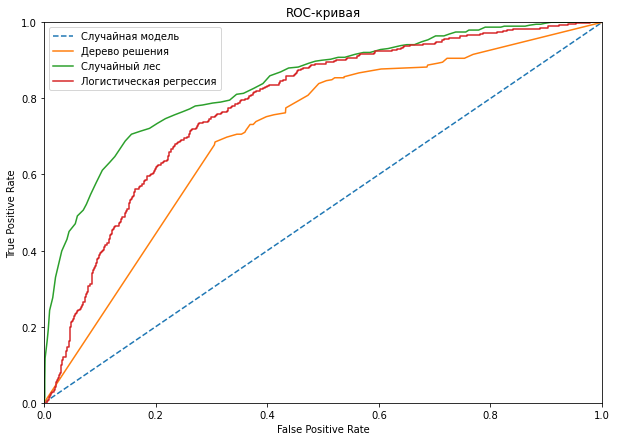

In [43]:
plt.figure()

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(dtc_fpr, dtc_tpr)
plt.plot(rfc_fpr, rfc_tpr)
plt.plot(log_fpr,log_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайная модель', 'Дерево решения', 'Случайный лес', 'Логистическая регрессия'), loc= 'upper left') 
plt.show()

Лучшее значение показала модель случайного леса, что заметно на графике.

Мы выбрали случайный лес с параметром n_estimators = 60, попробуем повысить f1 меру за счёт изменения глубины леса.

In [44]:
for i in range(1, 11, 1):
    rfc_model_balans = RandomForestClassifier(random_state=12345, n_estimators = 60, max_depth = i, class_weight = 'balanced')
    rfc_model_balans.fit(features_upsampled, target_upsampled)
    rfc_valid_predictions_balans = rfc_model_balans.predict(features_valid)
    accuracy = accuracy_score(target_valid, rfc_valid_predictions_balans)
    f1 = f1_score(target_valid, rfc_valid_predictions_balans)
    print(f'RandomForestClassifier, estimators = {i}, accuracy = {accuracy}; F1 = {f1}')

RandomForestClassifier, estimators = 1, accuracy = 0.7325; F1 = 0.5235975066785397
RandomForestClassifier, estimators = 2, accuracy = 0.762; F1 = 0.5592592592592592
RandomForestClassifier, estimators = 3, accuracy = 0.762; F1 = 0.5567970204841712
RandomForestClassifier, estimators = 4, accuracy = 0.785; F1 = 0.580078125
RandomForestClassifier, estimators = 5, accuracy = 0.788; F1 = 0.5834970530451865
RandomForestClassifier, estimators = 6, accuracy = 0.8015; F1 = 0.5944841675178754
RandomForestClassifier, estimators = 7, accuracy = 0.8105; F1 = 0.6031413612565445
RandomForestClassifier, estimators = 8, accuracy = 0.812; F1 = 0.6008492569002124
RandomForestClassifier, estimators = 9, accuracy = 0.8185; F1 = 0.5962180200222469
RandomForestClassifier, estimators = 10, accuracy = 0.8275; F1 = 0.6039035591274398


Для тестирования выберем модель случайного леса с глубиной равной 10.

**Вывод:**

В ходе выполнения этого шага мы сбалансировали данные, заново обучили все модели и выяснили, что значение f1 увеличилось во всех случаях. Так теперь самый хороший результат показывает модель дерева решений с параметрами n_estimators = 60, max_depth = 10, то её будем проверять далее на тестовой выборке.

## Тестирование модели

Мы обучили несколько различных моделей, выбрали из них наилучшую. Проверим её работу на тестовой выборке.

In [45]:
model = RandomForestClassifier(random_state=12345, n_estimators = 60, max_depth = 10, class_weight = 'balanced')
model.fit(features_upsampled, target_upsampled)
predictions = model.predict(features_test)

print(f"RandomForestClassifier. n_estimators = 60; F1 = {f1_score(target_test, predictions)}")

RandomForestClassifier. n_estimators = 100; F1 = 0.6404371584699454


**Вывод:**

Мы видим, что на тестовый выборке результат f1 несколько увелился и равен 0ю64, что соотвтетсвует требованиям проекта.

## Вывод

Итак, в ходе выполнения проекта мы проверили три модели обучения: дерево решений, случайный лес и логистическую регрессию, из них выбрали ту модель, которая показала наилучший результат. Модель случайного леса после борьбы с дисбалансом с параметрами n_estimators = 60 max_depth = 10 показывала значение f1 = 0.60 при обучении. Логистическая регрессия показала самый низкий результат.

В ходе тестирования модели результат f1 возрос до 0.64.